# Doenças cardiovasculares UCI

O propósito desse notebook é a criação de um simulador que irá prever o diagnóstico de Doenças Cardíacas através da aplicação de Machine Learning. 

Através da iniciativa da UCI Machine Learning da University of California, Irvin, com a coleta desses dados que possuem informações pessoais e médicas de 303 pacientes e 14 diferentes atributos, poderemos entender, com a aplicação de técnicas de Machine Learning, os principais fatores que levam as pessoas a desenvolverem doenças cardíacas e auxiliar os médicos na concessão de diagnósticos mais precisos.

# Obtenção dos dados

O conjunto de dados utilizados para estimar o modelo de Machine Learning foi obtido atráves do site https://archive.ics.uci.edu/ml/datasets/heart+Disease.
Neste link é possível obter as informações de cada variável.

Esses são os nomes de cada investigador principal responsável pela coleta de dados em sua respectiva instituição: 

1. Instituto Húngaro de Cardiologia. Budapeste: Andras Janosi, MD
2. Hospital Universitário, Zurique, Suíça: William Steinbrunn, MD
3. Hospital Universitário, Basileia, Suíça: Matthias Pfisterer, MD
4. Centro Médico VA, Long Beach e Cleveland Clinic Foundation: Robert Detrano, MD, Ph.D.


O dataset e o dicionário de variáveis disponibilizados no site não estão formatados em arquivos csv. Os dados estão em um arquivo .data e o dicionário de variáveis em um arquivo .name.

#Estruturação dos dados

Os dados fornecidos no site em questão serão processados e postos em um arquivo csv para facilitar a visualização e manuseio. 

Ao acessar o link acima, estaremos na página inicial do dataset e para termos acesso aos dados e as informações sobre as variáveis precisaremos clicar no aba 
"Data Folder". Lá encontraremos o arquivo que será trabalhado:

*   processed.cleveland.data: dataset.




Na página principal do projeto consta a informação de que o dataset de Cleveland é o único que tem sido usado, até então, em projetos de Machine Learning. Esse dataset conta com apenas 14 variáveis das 76 disponibilizados no banco de dados principal. Desta forma, é o dataset de Cleveland que será utilizado neste notebook.

Os 14 atributos utilizados estão discricionados em ordem na página principal:


1. 3 (idade)
2. 4 (sexo)
3. 9 (cp)
4. 10 (trestbps)
5. 12 (chol)
6. 16 (fbs)
7. 19 (restecg)
8. 32 (thalach)
9. 38 (exang)
10. 40 (oldpeak)
11. 41 (inclinação)
12. 44 (ca)
13. 51 (thal)
14. 58 (num) (o atributo previsto)

In [ ]:
#importando o dataset

import pandas as pd 

dados = pd.read_csv("processed.cleveland.data")
dados

Perceba que não há cabeçalho compreensível e temos uma interrogação na ultima linha do nosso dataframe, desta feita vamos trabalhar isso. 

In [ ]:
dados = pd.read_csv("processed.cleveland.data", header = None, na_values='?')
dados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Agora a interrogação passou a ser NaN e temos um cabeçalho que ainda não nos passa muita informação. Desta feita, vamos colocar nossas variáveis nesse dataset (a ordem foi disponibilizada na própria página principal do site oficial, como dito acima).

In [ ]:
dados.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 
                 'ca', 'thal', 'num']
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Pronto, já temos nosso dataset estruturado, vamos deixar ele no formato csv.

In [ ]:
dados.to_csv("doencas_cardiacas.csv", index = False)

## Processamento dos dados

In [ ]:
#importando bibiliotecas úteis para esse projeto

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar dataset da UCI
df = pd.read_csv("doencas_cardiacas.csv")

# visualizar as primeiras 5 entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Vou mudar os nomes das colunas para o seu significado na língua portuguesa

In [ ]:
df.columns = ["idade", "sexo", "dor_no_peito", "pressao_arterial", "colestoral_serico", "acucar_no_sangue", "eletrocardiograficos",
              "freq_cardiaca_max", "angina", "depressao_ST", "inclinacao", "vasos_principais_coloridos", "thal", "diagnostico"]  


df.head()

,idade,sexo,dor_no_peito,pressao_arterial,colestoral_serico,acucar_no_sangue,eletrocardiograficos,freq_cardiaca_max,angina,depressao_ST,inclinacao,vasos_principais_coloridos,thal,diagnostico
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Informações sobre atributos:


1. Idade: idade em anos do indivíduo 
2. Sexo: sexo do indivíduo (1 = masculino; 0 = feminino)

3. Dor_no_peito: 
- Valor 1: angina típica
- Valor 2: angina atípica
- Valor 3: dor não anginal
- Valor 4: sem sintomas 

4. Pressao_arterial: pressão arterial em repouso (em mm Hg na admissão no hospital)
5. Colasterol_serico: colestoral sérico em mg / dl
6. Acucar_no_sangue: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)
7. Eletrocardiograficos:  resultados eletrocardiográficos em repouso
- Valor 0: normal
- Valor 1: com anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão do ST>> 0,05 mV)
- Valor 2: mostrando hipertrofia provável ou definitiva do ventrículo esquerdo pelos critérios de Estes

8. Freq_cardiaca_max	: freqüência cardíaca máxima alcançada
9. Angina: angina induzida pelo exercício (1 = sim; 0 = não)
10. Depressao_ST: depressão do ST induzida pelo exercício em relação ao repouso

11. Inclinacao: a inclinação do pico do exercício segmento ST
- Valor 1: subida
- Valor 2: plano
- Valor 3 : descida 42 rldv5: altura em repouso

12. Vasos_principais_coloridos:  número de vasos principais (0-3) coloridos por flourosopy
13. Thal: 3 = normal; 6 = defeito fixo; 7 = defeito reversível
14. Diagnosico: diagnóstico de doença cardíaca

O atributo "diagnostico" será nossa variável dependente, ou seja, o objetivo é descobrir se uma pessoa com determinadas características possui ou não doença cardiáca.

In [ ]:
#vendo os valores únicos da variável dependente
df['diagnostico'].unique()

array([0, 2, 1, 3, 4])

Apesar de termos 5 valores de 0 a 1, nesse projeto só me interessa saber se a pessoa sofre ou não de doença cardiáca. Sendo os valores 1,2,3 e 4 deterministicos para classificar a pessoa com doença cardiáca, irei transformar esses valores em um só número.

*   0 = Não tem doença cardiáca 
*   1 = Tem doença cardiáca. Item da lista


In [ ]:
#convertendo valores

df.loc[df.diagnostico != 0, 'diagnostico'] = 1

Vamos ver se estamos diante de um dataset balanceado

In [ ]:
df.diagnostico.value_counts()

#percebemos que é balanceado

0    164
1    139
Name: diagnostico, dtype: int64

# Análises básicas do DataFrame

In [ ]:
#obtendo o tamanho do dataframe
df.shape

(303, 14)

In [ ]:
#verificar a existência de valores nulos

df.isnull().sum()

idade                         0
sexo                          0
dor_no_peito                  0
pressao_arterial              0
colestoral_serico             0
acucar_no_sangue              0
eletrocardiograficos          0
freq_cardiaca_max             0
angina                        0
depressao_ST                  0
inclinacao                    0
vasos_principais_coloridos    4
thal                          2
diagnostico                   0
dtype: int64

In [ ]:
# verificando os valores ausentes de vasos_principais_coloridos

df[df['vasos_principais_coloridos'].isnull()]

,idade,sexo,dor_no_peito,pressao_arterial,colestoral_serico,acucar_no_sangue,eletrocardiograficos,freq_cardiaca_max,angina,depressao_ST,inclinacao,vasos_principais_coloridos,thal,diagnostico
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


Esses pacientes não possuem resultado do teste de vasos coloridos por fluoroscopia, e apenas um foi diagnosticado com doença cardiovascular.

In [ ]:
#verificando os valores ausentes de thal

df[df['thal'].isnull()]

,idade,sexo,dor_no_peito,pressao_arterial,colestoral_serico,acucar_no_sangue,eletrocardiograficos,freq_cardiaca_max,angina,depressao_ST,inclinacao,vasos_principais_coloridos,thal,diagnostico
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1


Perceba que não são os mesmos pacientes que possuem o valor nulo em thal, mas desses apenas um foi diagnosticado com doença cardiovascular.

Por existir poucos valores nulos comparado a quantidade de dados existentes no dataframe, além das informações sobre saúde serem extremamente sensíveis pela sua particulariade, irei optar por excluir os valores nulos, já que não interferem muito no conjunto.

In [ ]:
# excluindo os valores ausentes
df.dropna(subset = ['vasos_principais_coloridos'], inplace = True)
df.dropna(subset = ['thal'], inplace = True)

In [ ]:
#novo tamanho do df

df.shape

(297, 14)

Agora vamos verificar se o novo dataset continua balanceado e quais variáveis realmente influenciam o diagnóstico de doença cardiovascular.

In [ ]:
# instalando pacote waffle
!pip install pywaffle -q
from pywaffle import Waffle

     |████████████████████████████████| 532kB 2.8MB/s 


In [ ]:
# quantidade de pessoas que possuem e não possuem a doença 
num = df['diagnostico'].value_counts()
num

0    160
1    137
Name: diagnostico, dtype: int64

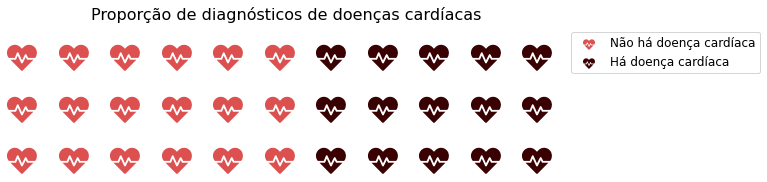

In [ ]:
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=3,
                columns=11,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de diagnósticos de doenças cardíacas',  'fontsize': 16},
                values=num, icons='heartbeat', icon_size=30, labels=('Não há doença cardíaca','Há doença cardíaca'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

In [ ]:
print('Proporção de pacientes sem doença cardíaca:\t {}%'.format(((df['diagnostico'].value_counts()[0]/df.shape[0])*100).round(2)))
print('Proporção de pacientes com doença cardíaca:\t {}%'.format(((df['diagnostico'].value_counts()[1]/df.shape[0])*100).round(2)))

Proporção de pacientes sem doença cardíaca:	 53.87%
Proporção de pacientes com doença cardíaca:	 46.13%


Chegamos a conclusão que o dataset está balanceado, visto que não há grande diferença entre as categorias da variável alvejada. É importante verificar isso pois queremos que nosso algoritmo seja bom em prever ambas situações possíveis, ou seja, ter e não ter doença cardíaca.

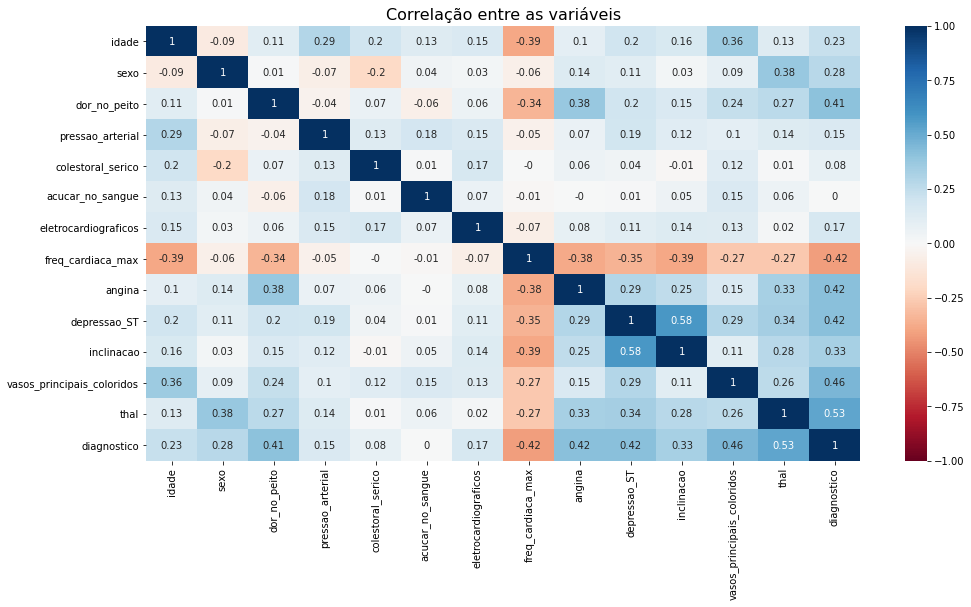

In [ ]:
# Mapa de calor
fig, ax = plt.subplots(figsize=(16,8))

corr = df.corr().round(2)

sns.heatmap(corr, cmap='RdBu', linecolor='white', annot=True, vmin=-1.00, vmax= 1.00)
ax.set_title('Correlação entre as variáveis', fontsize=16)

plt.show();

De acordo com o gráfico das correlações, é possível observar que a variável acucar_no_sangue, que informa se o índice glicêmico do paciente está elevado ou não, não é correlacionada com a variável num, desta feita, vamos eliminá-la dos dados de entrada do modelo. 

## Extraindo informações das variáveis catégoricas 

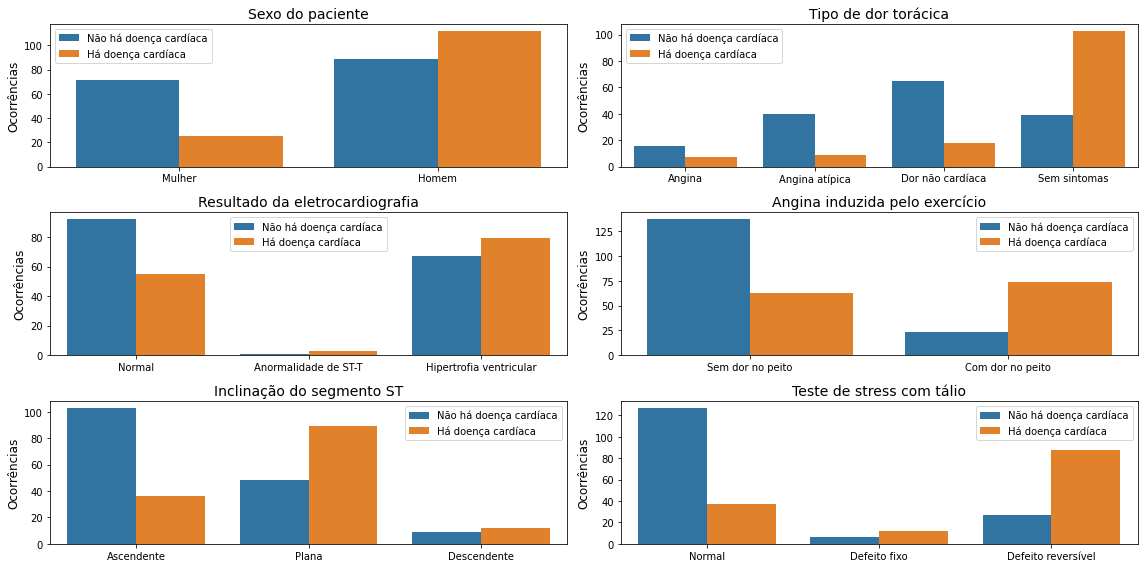

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,8))
fig.subplots_adjust(hspace=0.8, wspace=0.5)

# countplot sexo
sns.countplot(x='sexo', data=df, hue='diagnostico', ax=ax[0,0])
ax[0,0].set_xticklabels(['Mulher','Homem'])
ax[0,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Ocorrências', fontsize = 12)
ax[0,0].set_xlabel('')
ax[0,0].set_title('Sexo do paciente', fontsize=14)

# countplot dor no peito
sns.countplot(x='dor_no_peito', data=df, hue='diagnostico', ax=ax[0,1])
ax[0,1].set_xticklabels(['Angina','Angina atípica','Dor não cardíaca','Sem sintomas'])
ax[0,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('Ocorrências', fontsize = 12)
ax[0,1].set_xlabel('')
ax[0,1].set_title('Tipo de dor torácica', fontsize=14)

# countplot eletrocardiográficos
sns.countplot(x='eletrocardiograficos', data=df, hue='diagnostico', ax=ax[1,0])
ax[1,0].set_xticklabels(['Normal','Anormalidade de ST-T','Hipertrofia ventricular'])
ax[1,0].legend(loc='upper center',labels=['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('Ocorrências', fontsize = 12)
ax[1,0].set_xlabel('')
ax[1,0].set_title('Resultado da eletrocardiografia', fontsize=14)

# countplot angina 
sns.countplot(x='angina', data=df, hue='diagnostico', ax=ax[1,1])
ax[1,1].set_xticklabels(['Sem dor no peito','Com dor no peito'])
ax[1,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('Ocorrências', fontsize = 12)
ax[1,1].set_xlabel('')
ax[1,1].set_title('Angina induzida pelo exercício', fontsize=14)

# countplot inclinação 
sns.countplot(x='inclinacao', data=df, hue='diagnostico', ax=ax[2,0])
ax[2,0].set_xticklabels(['Ascendente','Plana','Descendente'])
ax[2,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,0].set_ylabel('Ocorrências', fontsize = 12)
ax[2,0].set_xlabel('')
ax[2,0].set_title('Inclinação do segmento ST', fontsize=14)

# countplot thal 
sns.countplot(x='thal', data=df, hue='diagnostico', ax=ax[2,1])
ax[2,1].set_xticklabels(['Normal','Defeito fixo','Defeito reversível'])
ax[2,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,1].set_ylabel('Ocorrências', fontsize = 12)
ax[2,1].set_xlabel('')
ax[2,1].set_title('Teste de stress com tálio', fontsize=14)

fig.tight_layout();

## Análise da variáveis númericas

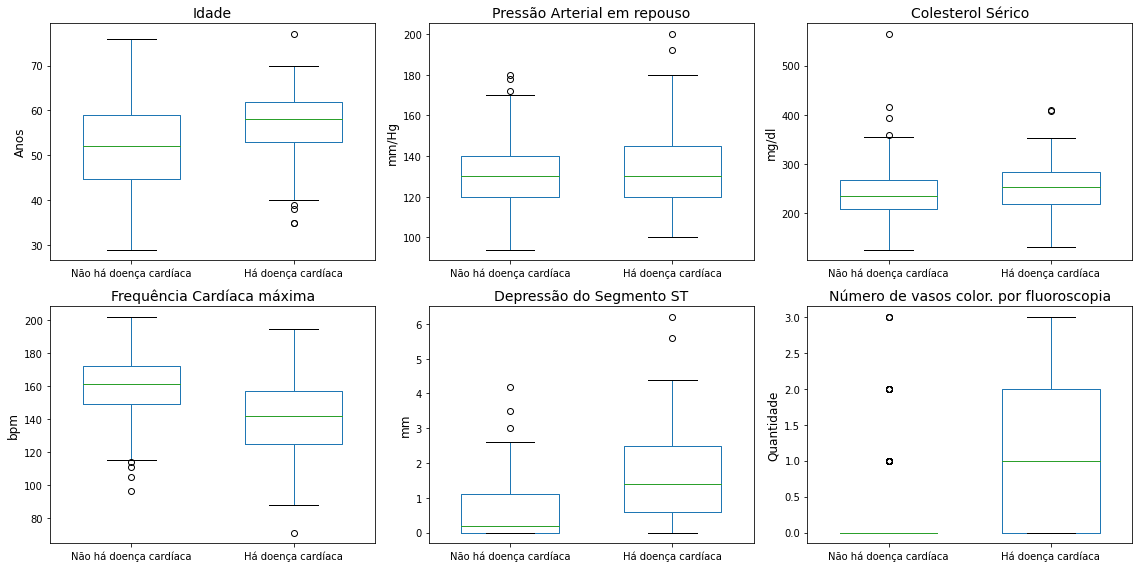

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# boxplot idade
df.boxplot('idade', ax=ax[0,0], widths=0.6, grid=False, by = 'diagnostico')
ax[0,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Anos', fontsize = 12)
ax[0,0].set_xlabel('')
ax[0,0].set_title('Idade', fontsize=14)
fig.suptitle('')

# boxplot pressão arterial em repouso
df.boxplot(['pressao_arterial'], ax=ax[0,1], widths=0.6, grid=False, by = 'diagnostico')
ax[0,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('mm/Hg', fontsize = 12)
ax[0,1].set_xlabel('')
ax[0,1].set_title('Pressão Arterial em repouso', fontsize=14)
fig.suptitle('')

# boxplot colestoral sérico
df.boxplot(['colestoral_serico'], ax=ax[0,2], widths=0.6, grid=False, by = 'diagnostico')
ax[0,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,2].set_ylabel('mg/dl', fontsize = 12)
ax[0,2].set_xlabel('')
ax[0,2].set_title('Colesterol Sérico', fontsize=14)
fig.suptitle('')

# boxplot freqüência cardíaca máxima 
df.boxplot(['freq_cardiaca_max'], ax=ax[1,0], widths=0.6, grid=False, by = 'diagnostico')
ax[1,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('bpm', fontsize = 12)
ax[1,0].set_xlabel('')
ax[1,0].set_title('Frequência Cardíaca máxima', fontsize=14)
fig.suptitle('')

# boxplot depressão do ST induzida pelo exercício em relação ao repouso 
df.boxplot(['depressao_ST'], ax=ax[1,1], widths=0.6, grid=False, by = 'diagnostico')
ax[1,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('mm', fontsize = 12)
ax[1,1].set_xlabel('')
ax[1,1].set_title('Depressão do Segmento ST', fontsize=14)
fig.suptitle('')

# boxplot número de vasos principais (0-3) coloridos por flourosopy
df.boxplot(['vasos_principais_coloridos'], ax=ax[1,2], widths=0.6, grid=False, by = 'diagnostico')
ax[1,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,2].set_ylabel('Quantidade', fontsize = 12)
ax[1,2].set_xlabel('')
ax[1,2].set_title('Número de vasos color. por fluoroscopia', fontsize=14)
fig.suptitle('')

fig.tight_layout();

### Modelos de Machine Learning

Verificando a influência das variáveis independentes na nossa variável alvo(dependente), chegamos a conclusão que serão utilizadas todas as variáveis do dataset, exceto a variável fbs que teve uma correlação igual a zero com a variável diagnóstico.

Como os pacientes são divididos em dois grupos na variável alvo, podemos dizer que essa variável é categórica, desta feita, iremos estimar um modelo de classificação.

In [ ]:
#separando dados de entrada e saída 
x = df.drop(['diagnostico','acucar_no_sangue'], axis = 1)
y = df['diagnostico']

In [ ]:
x.head()

,idade,sexo,dor_no_peito,pressao_arterial,colestoral_serico,eletrocardiograficos,freq_cardiaca_max,angina,depressao_ST,inclinacao,vasos_principais_coloridos,thal
0,63.0,1.0,1.0,145.0,233.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: diagnostico, dtype: int64

In [ ]:
#separando dados entre treino e teste 
from sklearn.model_selection import train_test_split

SEED = 20
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y)

print('O dataset de treino possui {}  e o de treino {}.'.format(X_train.shape[0], X_test.shape[0]))

In [ ]:
#instanciando modelos 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier  #é um classificador bobo. baseline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#validação cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, shuffle = True)#misturando um pouco mais as informações 

In [ ]:
def fit_and_predict(nome, modelo, x, y):
    scores = cross_val_score(modelo, x, y, cv=cv)
    taxa_de_acerto = np.mean(scores)
    msg = "Taxa de acerto do {0}: {1}".format(nome, taxa_de_acerto)
    print(msg)
    return taxa_de_acerto

In [ ]:
resultados = {}

#OneVsRest
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state=0))
resultadoOneVsRest = fit_and_predict("OneVsRest", modeloOneVsRest, x, y)
resultados[resultadoOneVsRest] = modeloOneVsRest


#OneVsOne

modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state=0))
resultadoOneVsOne = fit_and_predict("OneVsOne", modeloOneVsOne, x, y)
resultados[resultadoOneVsOne] = modeloOneVsOne

#MultinomialNB

modeloMultinomial = MultinomialNB()
resultadoMultinomial = fit_and_predict("MultinomialNB", modeloMultinomial, x, y)
resultados[resultadoMultinomial] = modeloMultinomial

#AdaBoostClassifier

modeloAdaBoost = AdaBoostClassifier(random_state=0)
resultadoAdaBoost = fit_and_predict("AdaBoostClassifier", modeloAdaBoost, x, y)
resultados[resultadoAdaBoost] = modeloAdaBoost

#Árvore de Decisão

modeloArvoreDecisao = DecisionTreeClassifier(max_depth=3)
resultadoArvoreDecisao = fit_and_predict("DecisionTree", modeloArvoreDecisao, x, y)
resultados[resultadoArvoreDecisao] = modeloArvoreDecisao

#SVC
modeloSVC = SVC()
resultadoSVC = fit_and_predict("SVC", modeloSVC, x, y)
resultados[resultadoSVC] = modeloSVC

#Regressão Logística  

modeloRLog = LogisticRegression(solver='liblinear') #mais indicada para datasets menores.
resultadoRLog = fit_and_predict("LogisticRegression", modeloRLog, x, y)
resultados[resultadoRLog] = modeloRLog

#Floresta Randômica
modeloRand = RandomForestClassifier(n_estimators=100)
resultadoRand = fit_and_predict("RandomForest", modeloRand, x, y)
resultados[resultadoRand] = modeloRand

#Modelo Bobo

modeloBobo = DummyClassifier()
resultadoBobo = fit_and_predict("DummyClassifier", modeloBobo, x, y)
resultados[resultadoBobo] = modeloBobo


print(resultados)

maximo = max(resultados)
vencedor = resultados[maximo]

print("Vencerdor: ")
print(vencedor)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Taxa de acerto do OneVsRest: 0.7641242937853108
Taxa de acerto do OneVsOne: 0.7644067796610169
Taxa de acerto do MultinomialNB: 0.761186440677966
Taxa de acerto do AdaBoostClassifier: 0.8218079096045198
Taxa de acerto do DecisionTree: 0.7645197740112994
Taxa de acerto do SVC: 0.6466666666666667
Taxa de acerto do LogisticRegression: 0.8415819209039548
Taxa de acerto do RandomForest: 0.8080790960451978
Taxa de acerto do DummyClassifier: 0.5214124293785312
{0.7641242937853108: OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001, verbose=0),
                    n_jobs=None), 0.7644067796610169: OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
   

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Pelos resultados temos que o modelo de regressão logística produz os melhores resultados. Então vamos ver como nosso modelo irá se sair com novos dados (dados teste).

In [ ]:
def teste_real(modelo, X_test, y_test):
    resultado = modelo.predict(X_test)

    acertos = resultado == y_test

    total_de_acertos = sum(acertos)
    total_de_elementos = len(y_test)

    taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos

    msg = "Taxa de acerto do vencedor entre os algoritmos no mundo real: {0}".format(taxa_de_acerto)
    print(msg)

In [ ]:
vencedor.fit(X_train, y_train)

teste_real(vencedor, X_test, y_test)

total_de_elementos = len(X_test)
print("Total de teste: %d" % total_de_elementos)

Taxa de acerto do vencedor entre os algoritmos no mundo real: 86.66666666666667
Total de teste: 60


## Outras métricas 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [ ]:
y_pred = modeloRLog.predict(X_test)
y_prob = modeloRLog.predict_proba(X_test)

In [ ]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9000    0.8438    0.8710        32
           1     0.8333    0.8929    0.8621        28

    accuracy                         0.8667        60
   macro avg     0.8667    0.8683    0.8665        60
weighted avg     0.8689    0.8667    0.8668        60

Acurácia: 0.8667

AUC: 0.9062



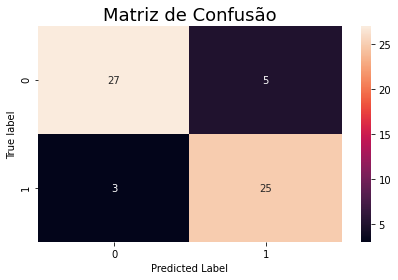

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

A matriz de confusão informa que:



*   O modelo previu corretamente 27 casos de pacientes que não foram diagnosticados com doença cardíaca.

*   O modelo previu corretamente 25 casos de pacientes que foram diagnosticados com doença cardíaca.

*   O modelo previu que 3 pacientes não teriam doença cardiaca, mas eles possuem doença cardíaca.

*   O modelo previu que 5 pacientes teriam doença cardiaca, mas eles não tem doença cardíaca.

Pelos resultados, nosso modelo tem uma acurácia de, aproximadamente, 87%, enquanto a AUC é de 0.91. E podemos concluir que o modelo é globalmente bem ajustado e que ambas as características, ter ou não doença cardíaca, são previstas de maneira satisfatória.

# Realizando previsões

In [ ]:
x.columns

Index(['idade', 'sexo', 'dor_no_peito', 'pressao_arterial',
       'colestoral_serico', 'eletrocardiograficos', 'freq_cardiaca_max',
       'angina', 'depressao_ST', 'inclinacao', 'vasos_principais_coloridos',
       'thal'],
      dtype='object')

In [ ]:
idade = 25.0
sexo = 0.0
dor_no_peito = 4.0
pressao_arterial = 90.0
colestoral_serico = 50.0
eletrocardiograficos = 2.0
freq_cardiaca_max = 150.0	
angina = 0.0
depressao_ST = 0.0
inclinacao = 1.0
vasos_principais_coloridos = 0.0
thal = 5.0
entrada = [[idade, sexo, dor_no_peito, pressao_arterial, colestoral_serico, eletrocardiograficos, freq_cardiaca_max, angina, depressao_ST, inclinacao, 
            vasos_principais_coloridos, thal]]

print('Previsão: {}'.format(modeloRLog.predict(entrada)[0]))

# Criando simulador interativo

In [ ]:
from ipywidgets import widgets, HBox, VBox, Layout, Label
from IPython.display import  display

style = {'description_width': '150px'}
style1 = {'description_width': '210px'}
style2 = {'description_width': '230px'}
layout = {'width': '400px'}

# Criando os controles do formulário
idade = widgets.Text(description="Idade (anos):", style=style, layout=layout)

sexo = widgets.RadioButtons(
    options=[('Homem', 1), ('Mulher', 0)],
    description='Sexo:',
    disabled=False, style=style)


dor_no_peito = widgets.RadioButtons(
    options=[('Angina', 1), ('Angina atípica', 2),('Dor não cardíaca', 3), ('Sem sintomas', 4)],
    description='Tipo de dor torácica:',
    disabled=False, style=style)


pressao_arterial = widgets.Text(description="Pressão arterial (mm/Hg):", style=style, layout=layout)

colestoral_serico = widgets.Text(description="Colesterol (mg/dl):", layout=layout, style=style)

eletrocardiograficos = widgets.RadioButtons(
    options=[('Normal', 0), ('Anormalidade do ST-T', 1),('Hipertrofia ventricular', 2)],
    description='Eletrocardiografia:',
    disabled=False, style=style, layout=layout
)

freq_cardiaca_max = widgets.Text(description="Frequência cardíaca (bpm):" , style=style1, layout=layout)

angina = widgets.RadioButtons(
    options=[('Não', 0), ('Sim', 1)],
    description='Angina após exercício:',
    disabled=False, style=style, layout=layout
)

depressao_ST = widgets.Text(description="Depressão do Segmento ST (mm):", style=style1, layout=layout)

inclinacao = widgets.RadioButtons(
    options=[('Ascendente', 1), ('Plana', 2), ('Descendente',3)],
    description='Inclinação do segmento ST-T:',
    disabled=False , style=style1, layout=layout)


vasos_principais_coloridos = widgets.Text(description="Vasos color. por fluoroscopia (quant.):", style=style2, layout=layout)

thal = widgets.RadioButtons(
    options=[('Normal', 3), ('Defeito fixo', 6), ('Defeito reversível',7)],
    description='Teste de stress cardíaco:',
    disabled=False, style=style
)

botao = widgets.Button(description="Simular") 

left = VBox([idade, pressao_arterial, colestoral_serico, freq_cardiaca_max, depressao_ST, vasos_principais_coloridos, inclinacao], layout=Layout(width='50%'))
right = VBox([sexo, angina, thal, dor_no_peito, eletrocardiograficos])
inputs = HBox([left, right])


# Função de simulação
def simulador(sender):
    entrada=[[
                float(idade.value if idade.value else 0), 
                float(sexo.value if sexo.value else 0), 
                float(dor_no_peito.value if dor_no_peito.value else 0), 
                float(pressao_arterial.value if pressao_arterial.value else 0), 
                float(colestoral_serico.value if colestoral_serico.value else 0), 
                float(eletrocardiograficos.value if eletrocardiograficos.value else 0),
                float(freq_cardiaca_max.value if freq_cardiaca_max.value else 0), 
                float(angina.value if angina.value else 0), 
                float(depressao_ST.value if depressao_ST.value else 0), 
                float(inclinacao.value if inclinacao.value else 0), 
                float(vasos_principais_coloridos.value if vasos_principais_coloridos.value else 0), 
                float(thal.value if thal.value else 0)
             ]]
    valor = modeloRLog.predict(entrada)[0]
    if valor == 0:
      diagn =  'Sem diagnóstico de doença cardiovascular.'
    else:
      diagn = 'Com diagnóstico de doença cardiovascular.'
    print('Previsão: {}\n'.format(diagn))
    print('Probabilidade: {}%'.format(float(((modeloRLog.predict_proba(entrada)[:,valor])*100).round(3))))
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)


In [ ]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())